In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
import seaborn as sns
import json
import os

In [2]:
# Load the CSV file
file_path = os.path.join("processed_data", "feature_selection_dataset.csv")
df = pd.read_csv(file_path)

print("Shape of the dataset:", df.shape)

Shape of the dataset: (1019035, 37)


In [3]:
def plot_feature_boxplot(df, feature, label_col='Label', figsize=(10, 5), palette='Set2'):
    plt.figure(figsize=figsize)
    sns.boxplot(data=df, x=label_col, y=feature, palette=palette)
    plt.title(f'Boxplot of "{feature}" by Class', fontsize=13)
    plt.xlabel('Attack Type')
    plt.ylabel(feature)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

C:\Users\Khanh Quynh\AppData\Local\Temp\ipykernel_28628\2808697939.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=label_col, y=feature, palette=palette)


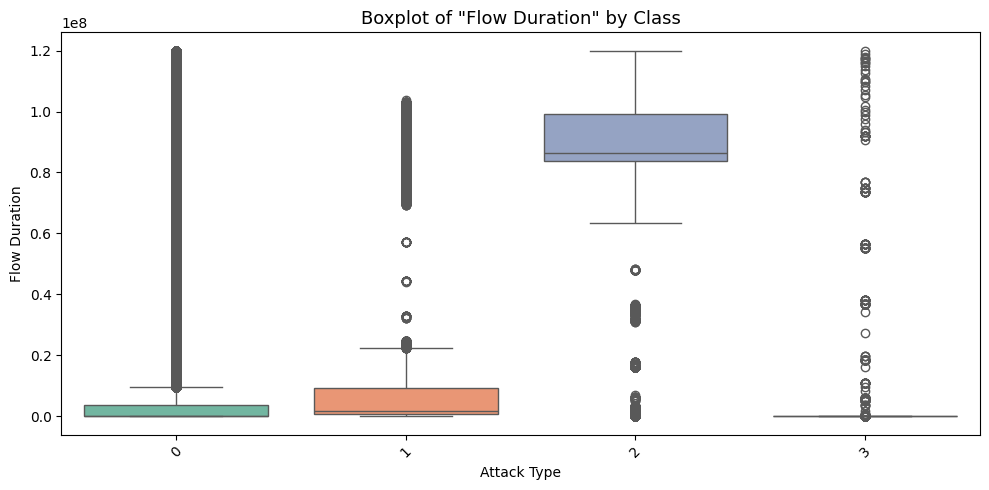

C:\Users\Khanh Quynh\AppData\Local\Temp\ipykernel_28628\2808697939.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=label_col, y=feature, palette=palette)


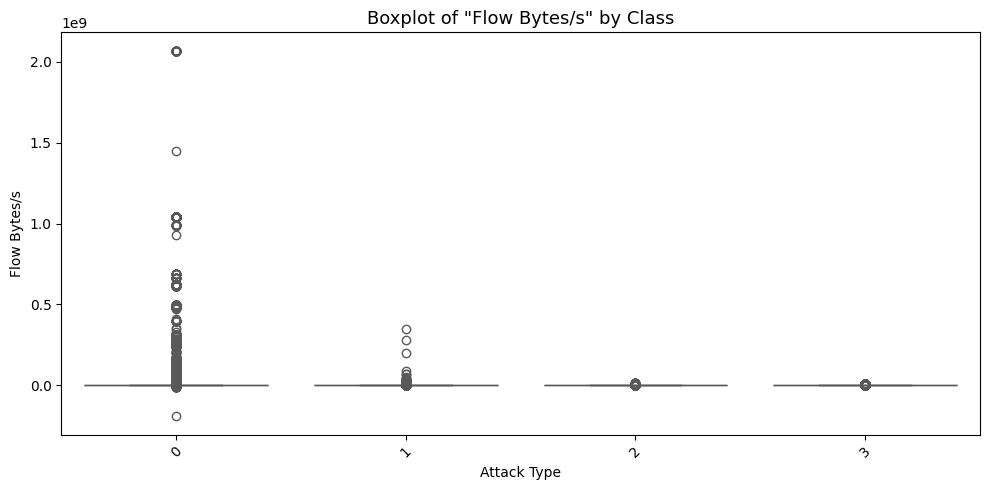

C:\Users\Khanh Quynh\AppData\Local\Temp\ipykernel_28628\2808697939.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=label_col, y=feature, palette=palette)


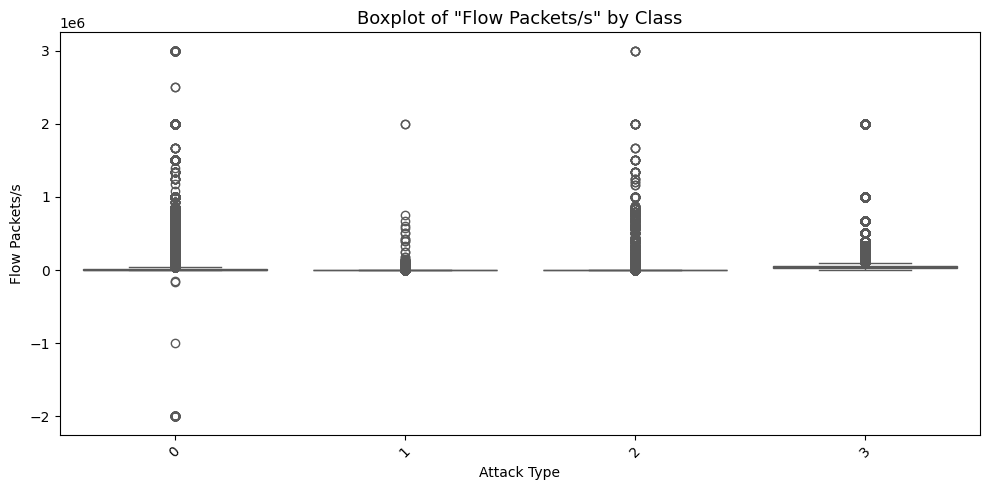

C:\Users\Khanh Quynh\AppData\Local\Temp\ipykernel_28628\2808697939.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=label_col, y=feature, palette=palette)


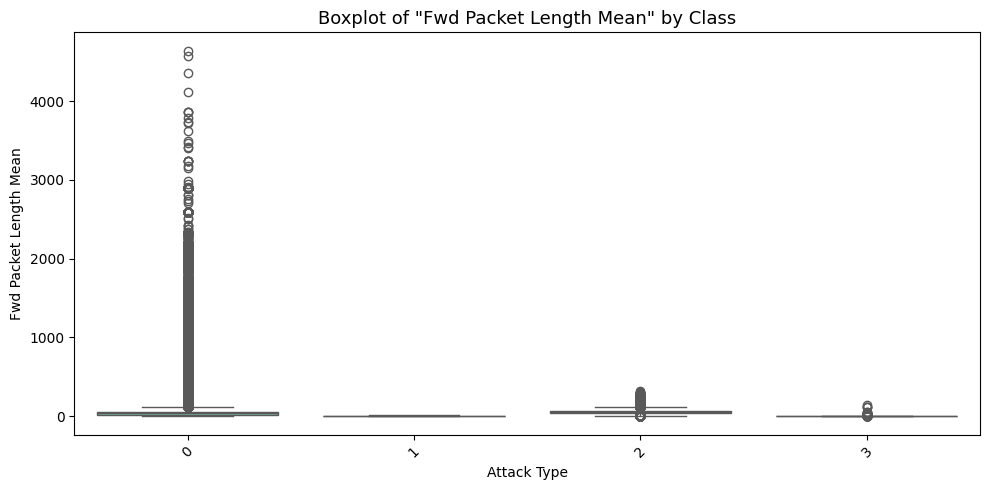

C:\Users\Khanh Quynh\AppData\Local\Temp\ipykernel_28628\2808697939.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=label_col, y=feature, palette=palette)


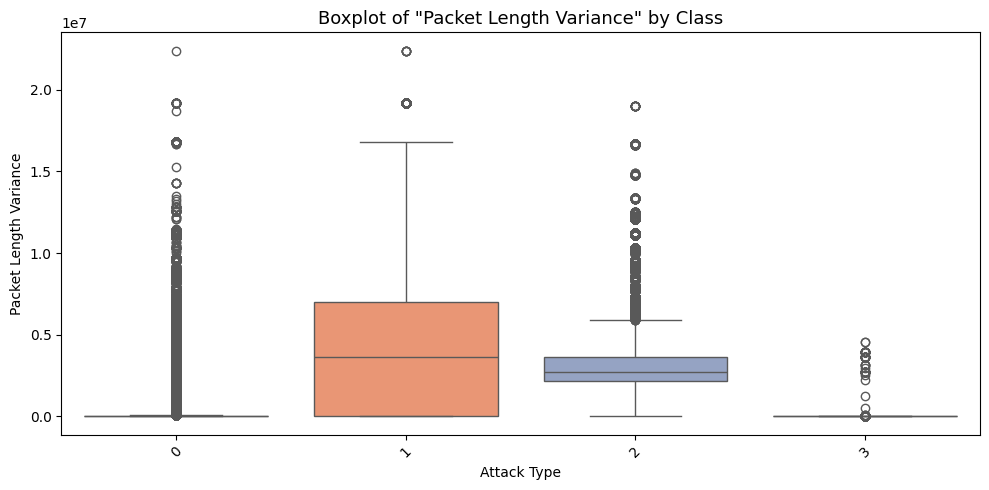

C:\Users\Khanh Quynh\AppData\Local\Temp\ipykernel_28628\2808697939.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=label_col, y=feature, palette=palette)


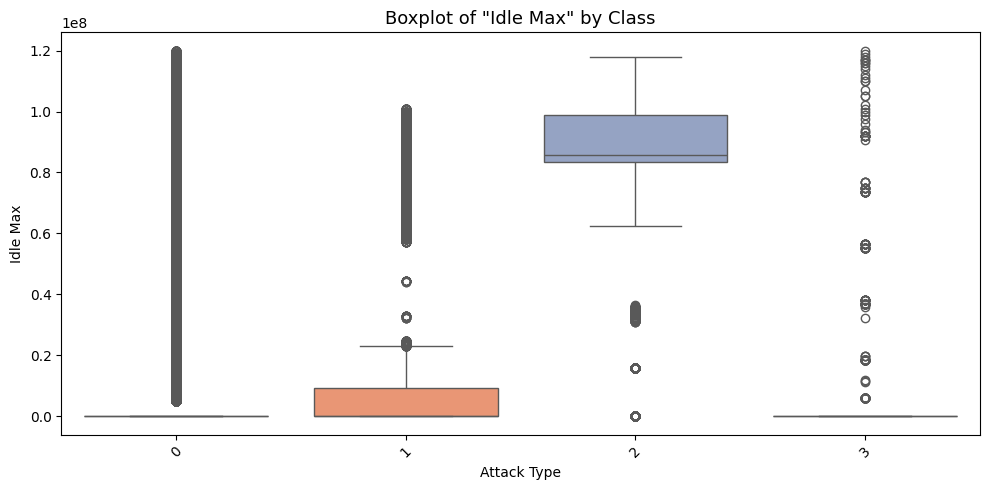

C:\Users\Khanh Quynh\AppData\Local\Temp\ipykernel_28628\2808697939.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=label_col, y=feature, palette=palette)


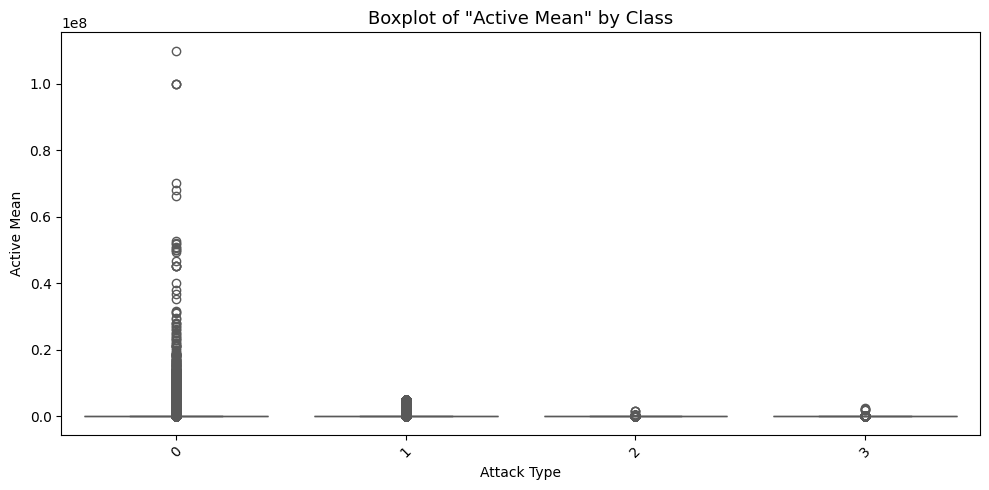

C:\Users\Khanh Quynh\AppData\Local\Temp\ipykernel_28628\2808697939.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=label_col, y=feature, palette=palette)


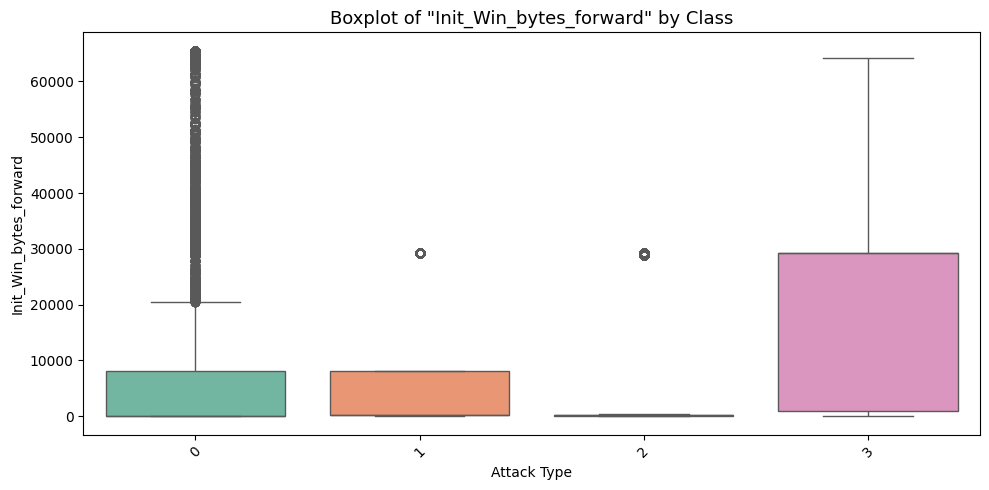

In [4]:
# Plot features for analysis
plot_feature_boxplot(df, feature='Flow Duration', label_col='Label')
plot_feature_boxplot(df, feature='Flow Bytes/s', label_col='Label')
plot_feature_boxplot(df, feature='Flow Packets/s', label_col='Label')
plot_feature_boxplot(df, feature='Fwd Packet Length Mean', label_col='Label')
plot_feature_boxplot(df, feature='Packet Length Variance', label_col='Label')
plot_feature_boxplot(df, feature='Idle Max', label_col='Label')
plot_feature_boxplot(df, feature='Active Mean', label_col='Label')
plot_feature_boxplot(df, feature='Init_Win_bytes_forward', label_col='Label')

In [5]:
# Initial selected features
features = [
    'Flow Duration',
    'Flow Bytes/s',
    'Flow Packets/s',
    'Fwd Packet Length Mean',
    'Packet Length Variance',
    'Idle Max',
    'Active Mean',
    'Init_Win_bytes_forward'
]

In [6]:
# Split train and test set
X = df.drop(columns=["Label"])
y = df["Label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

In [7]:
# Create new features based on previous selected features
def create_features(df):
    df = df.copy()
    df['Flow_Byte_to_Packet_Ratio'] = df['Flow Bytes/s'] / (df['Flow Packets/s'] + 1e-6)
    df['Duration_Packet_Stability'] = df['Flow Duration'] * df['Packet Length Variance']
    df['Port_Change_Rate'] = df['Fwd Packet Length Mean'] / (df['Init_Win_bytes_forward'] + 1e-6)
    df['Flow_Burstiness'] = df['Idle Max'] / (df['Active Mean'] + 1e-6)
    return df

In [8]:
# Add new features for train and test set
X_train = create_features(X_train)
X_test = create_features(X_test)

train_df = X_train.copy()
train_df["Label"] = y_train
test_df = X_test.copy()
test_df["Label"] = y_test

<Axes: >

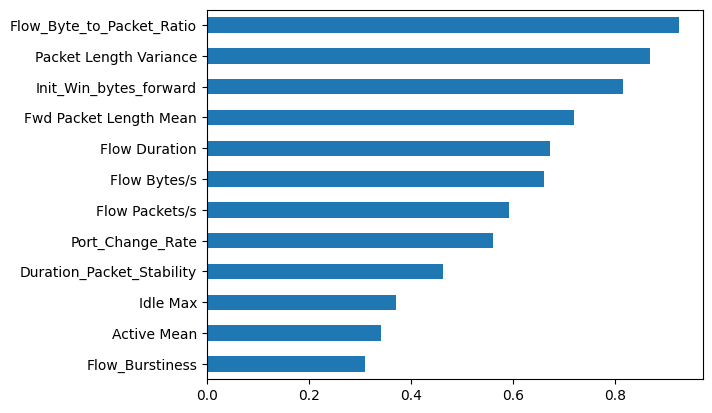

In [9]:
# Check MI scores of all selected features
new_features = features + ['Flow_Byte_to_Packet_Ratio', 'Duration_Packet_Stability','Port_Change_Rate','Flow_Burstiness']
mi_scores_new = mutual_info_classif(train_df[new_features], train_df["Label"])
pd.Series(mi_scores_new, index=new_features).sort_values().plot.barh()

In [10]:
# Final features
final_features = [
    'Flow Duration',
    'Flow Bytes/s',
    'Flow Packets/s',
    'Fwd Packet Length Mean',
    'Packet Length Variance',
    'Idle Max',
    'Active Mean',
    'Init_Win_bytes_forward',
    'Flow_Byte_to_Packet_Ratio',
    'Duration_Packet_Stability',
    'Port_Change_Rate',
    'Flow_Burstiness'
]

with open('processed_data/final_features.json', 'w') as f:
    json.dump(final_features, f, indent=4)

print("Saved final features to final_features.json")

Saved final features to final_features.json


In [11]:
print(f"Shape of train set: {train_df.shape}")
print(f"Shape of test set: {test_df.shape}")

Shape of train set: (815228, 41)
Shape of test set: (203807, 41)


In [12]:
# Save train and test dataset to CSV files
train_df.to_csv("processed_data/train_dataset.csv", index=False)
print("Data saved to train_dataset.csv")

test_df.to_csv("processed_data/test_dataset.csv", index=False)
print("Data saved to test_dataset.csv")

Data saved to train_dataset.csv
Data saved to test_dataset.csv
